In [16]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.fft import fft, ifft, fftfreq
from scipy.signal import find_peaks
import pandas as pd

In [17]:
data = yf.download('DNO.OL', start='2003-01-01', end='2024-05-22')['Adj Close']
df = pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


In [18]:
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

## Setting parameters

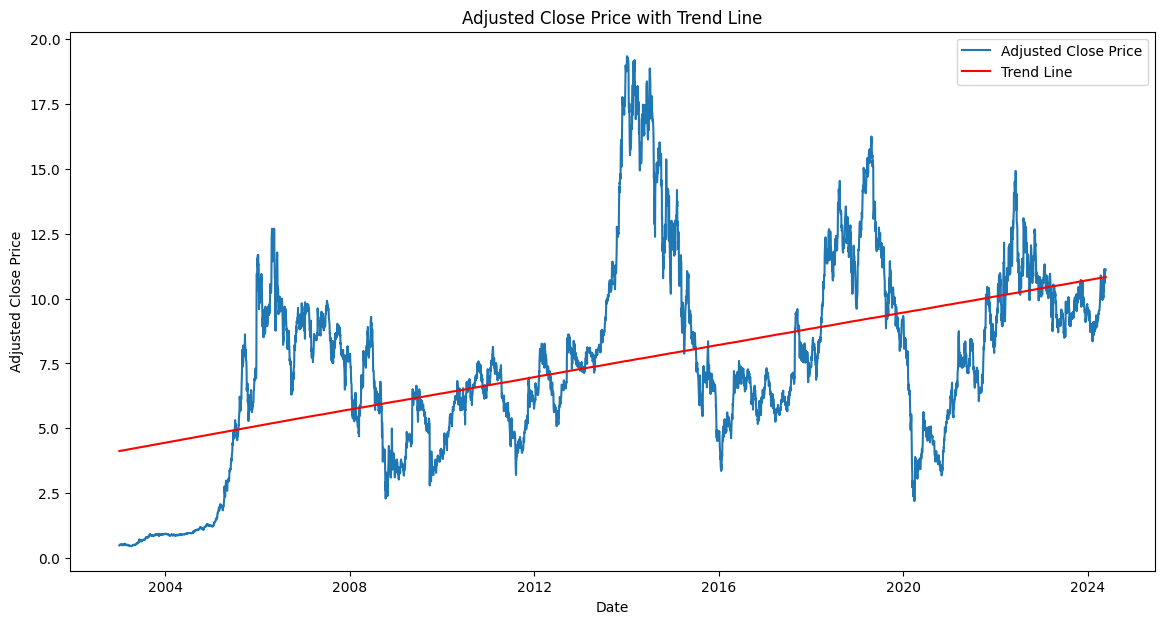

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Uavhengig variabel (tidsindeks)
time = np.arange(len(df)).reshape(-1, 1)

# Opprett og tren modellen
model = LinearRegression()
model.fit(time, data)

# Prediker trend
trend = model.predict(time)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['adj_close'], label='Adjusted Close Price')
plt.plot(df.index, trend, label='Trend Line', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price with Trend Line')
plt.legend()
plt.show()

In [50]:
print(model.coef_)
print(model.intercept_)

[0.00124043]
4.1235638472416465
0.2589328691212329


In [51]:
coefficients = model.coef_
intercept = model.intercept_

# Calculate the variance
variance = np.var(coefficients)

# Calculate the mean
mean = np.mean(coefficients)

print("Variance:", variance)
print("Mean:", mean)

Variance: 0.0
Mean: 0.0012404260558225393


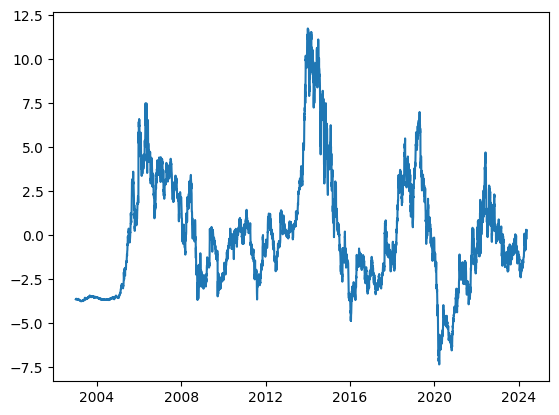

In [20]:
detrend = data - trend
plt.plot(detrend)

## Funksjoner

In [21]:
def make_sin_data(data):
    num_points = 100  # Du kan justere antallet punkter for å få ønsket glatthet i kurvene
    amplitudes = []
    phases = []
    # Gå gjennom hvert komplekse tall i X for å generere og plotte sinusfunksjonen for hver frekvens
    plt.figure(figsize=(12, 6))
    for d in data[:10]:
        amplitude = np.abs(d)  # Amplituden er størrelsen til det komplekse tallet
        amplitudes.append(amplitude)
        phase = np.angle(d)  # Fasen er vinkelen til det komplekse tallet
        phases += phase

        # Generer x-aksen 
        t = np.linspace(0, 2*np.pi, num_points)  # Her antas det at sinusoiden er én periode

        # Beregn sinusoiden med amplituden og fasen for det gjeldende komplekse tallet
        sin_wave = amplitude * np.sin(t + phase)

        plt.plot(t, sin_wave)

    

    plt.xlabel('Tiden det tar rundt en sirkel')
    plt.ylabel('Amplituden')
    plt.title('Sinus kurver for de 10 første frekvensene')
    plt.grid(True)
    plt.show()

    return amplitudes, phases

In [22]:
def create_sin (data, n, complex_func, peak_freq):
    frekvens = peak_freq
    amplitude = np.abs(complex_func)
    fase = np.angle(complex_func)
    offset = np.mean(data)

    sinwave = amplitude * np.exp(1j * (2 * np.pi * frekvens * n + fase)) + offset

    return sinwave

In [23]:
def fit_sin(n, data, complex_func, period):
    guess_freq = 2 * np.pi / period
    guess_amplitude = np.abs(complex_func)
    guess_phase = np.angle(complex_func)
    guess_offset = np.mean(data)
    
    guess_param = [guess_freq, guess_amplitude, guess_phase, guess_offset]
    
    # Sinus function to be fitted with the parameters
    def sin_func(n, freq, amplitude, phase, offset):
        return np.sin(n * freq + phase) * amplitude + offset

    # scipy.optimize.curve_fit(f, xdata, ydata, p0=None)
    fit = curve_fit(sin_func, n, data, p0=guess_param)

    optimized_params = fit[0]
    
    # Assumes ydata = f(xdata, *params) + eps.
    fitted_sin = sin_func(n, *optimized_params)

    # Finn indeksene til maksimalverdiene (toppene)
    peak_indices = np.where((fitted_sin[:-2] < fitted_sin[1:-1]) & (fitted_sin[1:-1] > fitted_sin[2:]))[0] + 1
    peaks_x = n[peak_indices]
    peaks_y = fitted_sin[peak_indices]

    # Beregn perioden mellom topper (avstanden mellom de to første toppene)
    period = peaks_x[1] - peaks_x[0]

    # Finn indekser for topper i dataene
    # peaks_indices, _ = find_peaks(fitted_sin)

    # # Hent x- og y-verdier for toppene
    # peaks_x = n[peaks_indices]
    # peaks_y = data[peaks_indices]

    # Vis perioden mellom topper
    print(f"Perioden mellom topper: {period}")

    return fitted_sin, fit, peaks_x, peaks_y

In [24]:
def create_fourier_series(f_oneside, X_oneside, data, n, threshold):
    # Calculate amplitudes and phases
    amplitudes = np.abs(X_oneside)
    phases = np.angle(X_oneside)
    
    # Determine significant frequencies based on the threshold
    significant_indices = amplitudes > threshold
    significant_freqs = f_oneside[significant_indices]
    significant_amps = amplitudes[significant_indices]
    significant_phases = phases[significant_indices]
    
    # Calculate the mean offset of the data
    offset = np.mean(data)
    
    # Initialize the Fourier series with the offset
    fourier_series = np.full(len(data), offset, dtype=np.complex128)
    
    # Add significant frequency components to the Fourier series
    for freq, amp, phase in zip(significant_freqs, significant_amps, significant_phases):
        t = np.arange(len(data))
        cosine_component = amp * np.cos(2 * np.pi * freq * t + phase)
        sine_component = amp * np.sin(2 * np.pi * freq * t + phase)
        fourier_series += cosine_component + sine_component
    
    return fourier_series

### Setting parameters

In [25]:
N = len(data)
n = np.arange(N)
lin_trend = len(n)

# Sampling rate
sr = 1
T = N/sr
# Sampling interval
ts = 1/sr

# Frequncies
freq = fftfreq(N, ts)

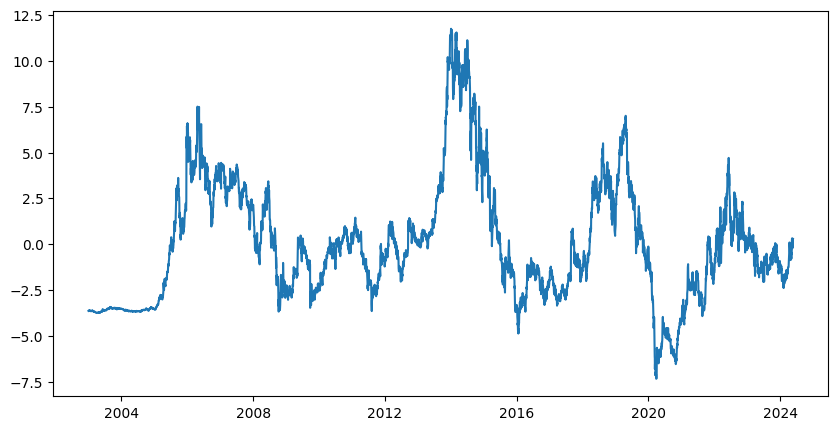

In [26]:
data_without_dc = detrend - np.mean(detrend)
plt.figure(figsize=(10, 5))
plt.plot(data_without_dc)

## Ulike fourier former

Discrete fourier transform

Fast fourier transform

## Frekvensanalysen

In [27]:
ft = fft(data_without_dc)
ft[0]=0
ft

array([    0.           +0.j        , -3807.25332952-1097.00570523j,
         -78.01323558-2290.87277812j, ..., -4871.50076532-2315.82114227j,
         -78.01323558+2290.87277812j, -3807.25332952+1097.00570523j])

- N//2: It slices the freq array to get the one-sided frequency values, f_oneside, which range from 0 to the Nyquist frequency, which is half of the sampling frequency.

- It slices the X array to get the one-sided DFT coefficients, X_oneside, and normalizes them by dividing by n_oneside. This is to get the correct amplitude values of the signal in the time domain.

C:\Users\bugat\AppData\Local\Temp\ipykernel_39504\55991189.py:6: RuntimeWarning: divide by zero encountered in divide
  f_d = 1/f_oneside / (sr)


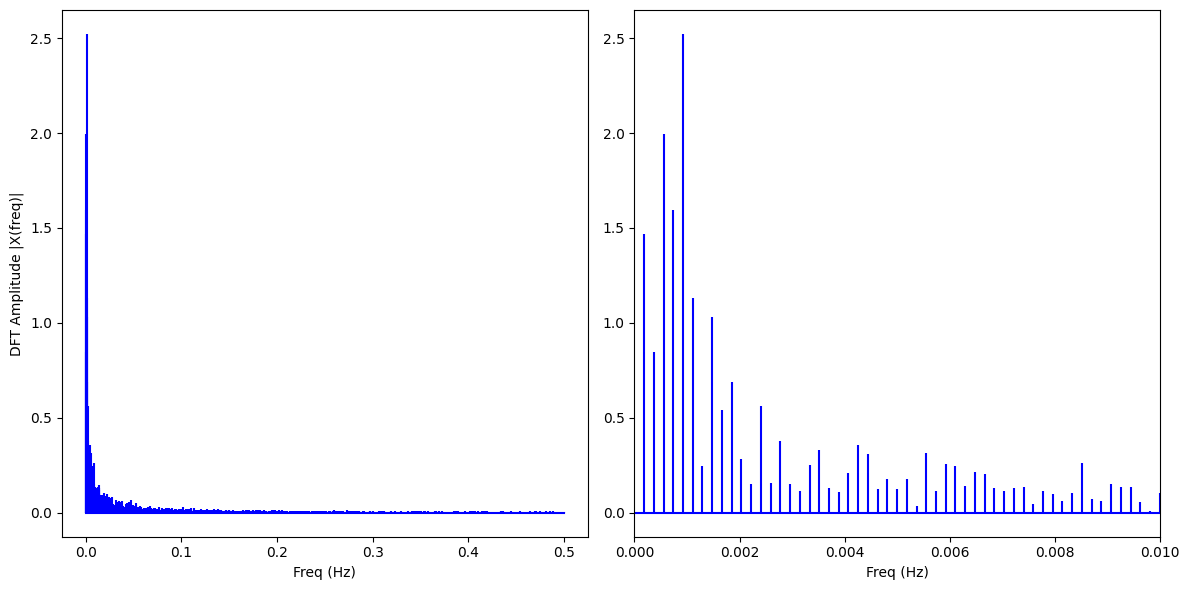

In [28]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# convert frequency to days
f_d = 1/f_oneside / (sr)

# normalize the amplitude
X_oneside = ft[:n_oneside]/n_oneside

# Finding the amplitudes
amplitudes = np.abs(X_oneside)

# Finding the phases
phases = np.angle(X_oneside)

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.stem(f_oneside, amplitudes, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, amplitudes, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 0.01)
plt.tight_layout()
plt.show()

In [29]:
max_amp = np.max(amplitudes)
max_amp

2.522050269872073

In [30]:
# Calculate the absolute values of the DFT coefficients to determine the dominant frequencies within the data
max_amplitude_index = np.argmax(amplitudes)

# We find the frequency that matches the maximum amplitude in our time series
peak_freq = f_oneside[max_amplitude_index]

# Finding the max amplitude corresponding to index
max_amplitude = amplitudes[max_amplitude_index]

# Calulating the estimated period of the signal by taking the inverse of the peak frequncy
period = 1 / peak_freq
complex_func = X_oneside[max_amplitude_index]

print('Complex number: ', complex_func)
print('Index of the max ampltiude: ', max_amplitude_index)
print("Corresponding maximum amplitude: ", max_amplitude)
print("Peak frequenzy in Hz:", peak_freq)
print('Period: ', (period))

Complex number:  (-0.34920843391140954+2.497757200659611j)
Index of the max ampltiude:  5
Corresponding maximum amplitude:  2.522050269872073
Peak frequenzy in Hz: 0.0009250693802035152
Period:  1081.0


Peak amplitude er lik index 2, som vil si frekvens lik 2

## Sinustilpasning uten minste kvadratsmetode

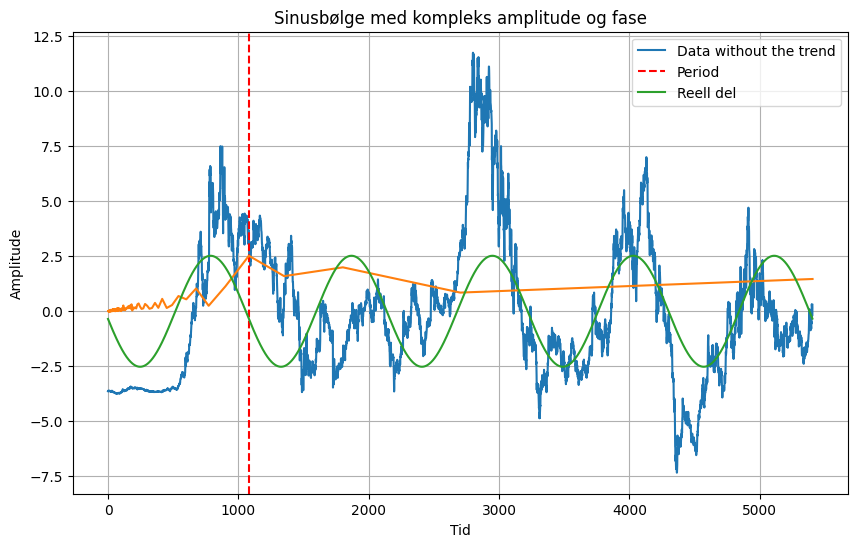

In [44]:
sinwave = create_sin(data_without_dc, n, complex_func, peak_freq)
# Plott sinusbølgen
plt.figure(figsize=(10, 6))
plt.plot(n, data_without_dc, label='Data without the trend')
plt.axvline(x=period, color='red', linestyle='--', label='Period')
plt.plot(f_d, amplitudes)
plt.plot(n, sinwave.real, label='Reell del')
# plt.plot(n, sinwave.imag, label='Imaginær del')

plt.xlabel('Tid')
plt.ylabel('Amplitude')
plt.title('Sinusbølge med kompleks amplitude og fase')
plt.legend()
plt.grid(True)
plt.show()


## Sinustilpasning med minste kvadratsmetode

c:\Users\bugat\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Perioden mellom topper: 1033


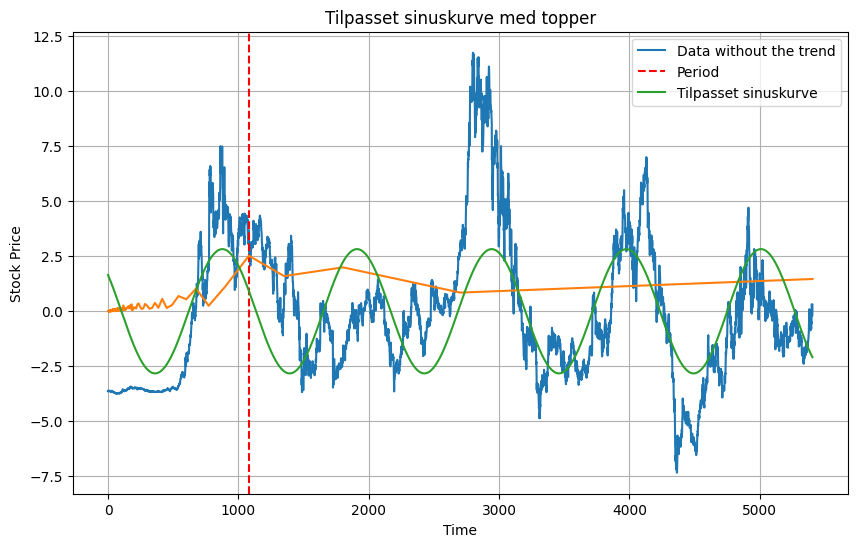

In [43]:
fitted_sin, fit, peaks_x, peaks_y = fit_sin(n, data_without_dc, complex_func, period)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n, data_without_dc, label='Data without the trend')
plt.axvline(x=period, color='red', linestyle='--', label='Period')
plt.plot(f_d, amplitudes)

plt.plot(n, fitted_sin, label='Tilpasset sinuskurve')
# plt.scatter(peaks_x, peaks_y, color='red', label='Topper')
# plt.scatter(peaks_x_f, peaks_y_f, color='red', label='Topper')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.title('Tilpasset sinuskurve med topper')
plt.show()

## Prediksjon

In [ ]:
amplitudes

array([0.00000000e+00, 2.23084176e+00, 2.21465198e-01, ...,
       7.21973812e-03, 1.10349620e-03, 1.30894559e-03])

c:\Users\bugat\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\bugat\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


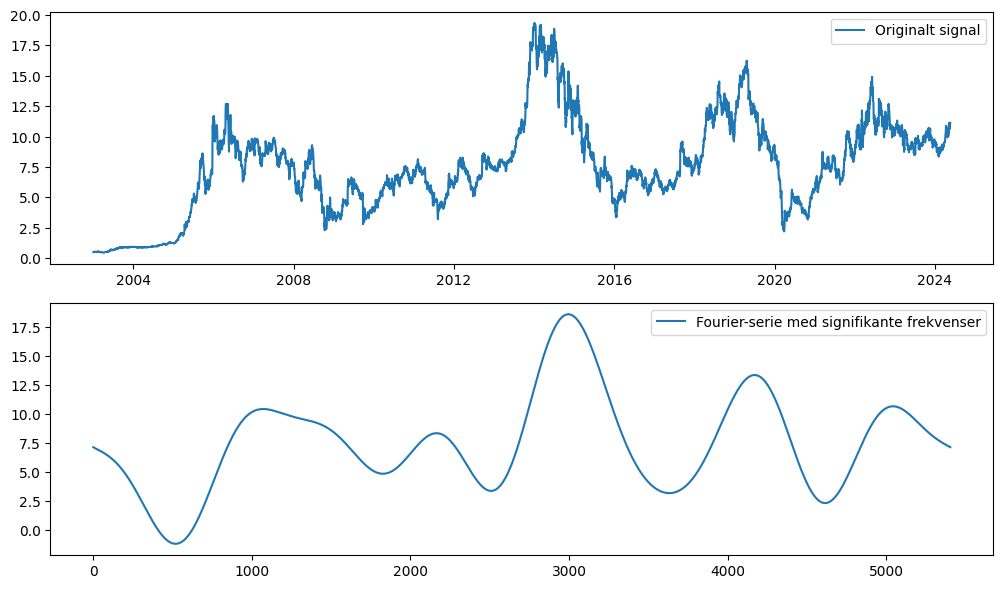

In [45]:
fourier_series = create_fourier_series(f_oneside, X_oneside, data, n, 1)

# Plot det opprinnelige signalet og Fourier-serien
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data, label='Originalt signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fourier_series, label='Fourier-serie med signifikante frekvenser')
plt.legend()

plt.tight_layout()
plt.show()

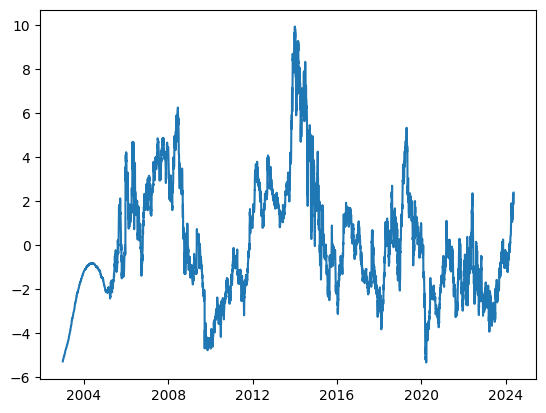

In [52]:
deseasoned = detrend - fitted_sin

plt.plot(deseasoned)